In [1]:
import argparse
import matplotlib.pyplot as plt

In [2]:
def extract_info_from_file(log_file):

    result_y = []
    result_x = []
    with open(log_file, 'r') as f:
        for line in f.readlines():
            ss = line.split(' ')
            if ss[0] == 'step:':
                result_x.append(int(ss[1][0:-1])+1)
                result_y.append(float(ss[3][0:-1]))
            elif ss[0] == 'DLL':
                if ss[4] == 'Iteration:':
                    result_x.append(int(ss[5]))
                    result_y.append(float(ss[21]))

    return result_x,result_y

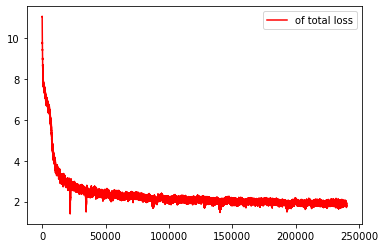

In [3]:
of_x, of_y = extract_info_from_file('./dev_add_bert_fp16_b48_dloss_1.log')


l2, = plt.plot(of_x, of_y, color='red', label='of bias_add')
plt.legend(loc = 'upper right')
plt.show()

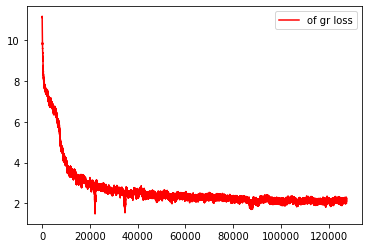

In [4]:
of_x, of_y = extract_info_from_file('./dev_gr_of_bert_display_loss_only_1.log')


l2, = plt.plot(of_x, of_y, color='red', label='of gr loss')
plt.legend(loc = 'upper right')
plt.show()

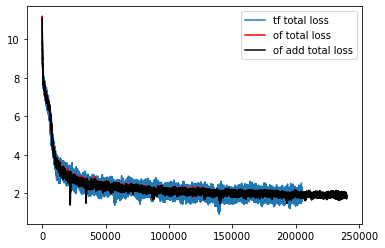

In [10]:
tf_x, tf_y = extract_info_from_file('./bert_b48_fp16_1.log')
of_x, of_y = extract_info_from_file('./dev_gr_of_bert_display_loss_only_1.log')
of_add_x, of_add_y = extract_info_from_file('./dev_add_bert_fp16_b48_dloss_1.log')
l1, = plt.plot(tf_x[0:len(of_add_x)], tf_y, label='tf total loss')
l2, = plt.plot(of_x[0:len(of_add_x)], of_y, color='red', label='of gr total loss')
l3, = plt.plot(of_add_x, of_add_y, color='black', label='of add total loss')
plt.legend(loc = 'upper right')
plt.show()

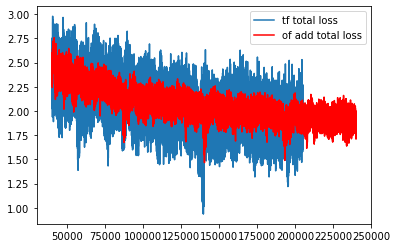

In [17]:
tf_x, tf_y = extract_info_from_file('./bert_b48_fp16_1.log')
of_x, of_y = extract_info_from_file('./dev_gr_of_bert_display_loss_only_1.log')
of_add_x, of_add_y = extract_info_from_file('./dev_add_bert_fp16_b48_dloss_1.log')
l1, = plt.plot(tf_x[40000:len(of_add_x)], tf_y[40000:len(of_add_x)], label='tf total loss')
#l2, = plt.plot(of_x[0:len(of_add_x)], of_y, color='red', label='of total loss')
l3, = plt.plot(of_add_x[40000:len(of_add_x)], of_add_y[40000:len(of_add_x)], color='red', label='of add total loss')
plt.legend(loc = 'upper right')
plt.show()

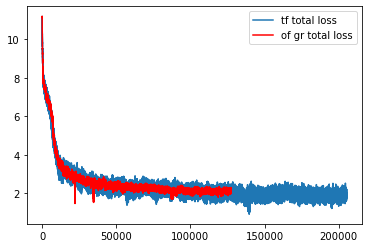

In [14]:
tf_x, tf_y = extract_info_from_file('./bert_b48_fp16_1.log')
of_x, of_y = extract_info_from_file('./dev_gr_of_bert_display_loss_only_1.log')
of_add_x, of_add_y = extract_info_from_file('./dev_add_bert_fp16_b48_dloss_1.log')
l1, = plt.plot(tf_x, tf_y, label='tf total loss')
l2, = plt.plot(of_x[0:len(tf_x)], of_y, color='red', label='of gr total loss')
#l3, = plt.plot(of_add_x, of_add_y, color='red', label='of add total loss')
plt.legend(loc = 'upper right')
plt.show()

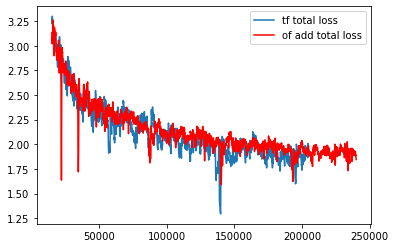

In [30]:
import numpy as np 
a = [1,2,3,4,5,6]
#求均值
a_mean = np.mean(a)
tf_x, tf_y = extract_info_from_file('./bert_b48_fp16_1.log')
tf_x = tf_x[::100]

avg_tf_y = []

step = 100
for i in range(0,len(tf_y),step):
    avg_tf_y.append(np.mean(tf_y[i:i+step]))

of_add_x, of_add_y = extract_info_from_file('./dev_add_bert_fp16_b48_dloss_1.log')
of_add_x = of_add_x[::100]
avg_of_y = []
for i in range(0,len(of_add_y),step):
    avg_of_y.append(np.mean(of_add_y[i:i+step]))

l1, = plt.plot(tf_x[150:], avg_tf_y[150:], label='tf total loss')

l3, = plt.plot(of_add_x[150:], avg_of_y[150:], color='red', label='of add total loss')
plt.legend(loc = 'upper right')
plt.show()